In [1]:
import os
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd

In [3]:
path = "/kaggle/input/brain-tumor-classification-mri/Testing/no_tumor/image(1).jpg"
pic = Image.open(path)

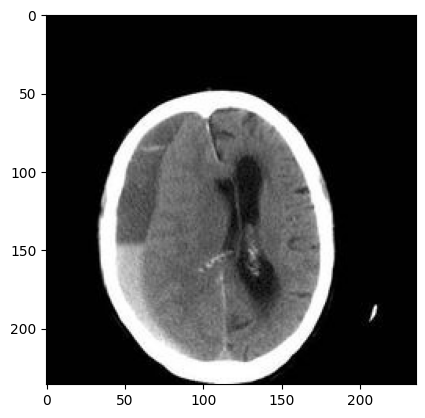

In [4]:
plt.imshow(pic)

In [2]:
path_train = "/kaggle/input/brain-tumor-classification-mri/Training"
classes = {'no_tumor':0 , 'pituitary_tumor':1}

In [3]:
X_train = []
Y_train = []

In [ ]:
for clas in classes:
    path_s = path_train + '/' + clas
    for j in os.listdir(path_s):
        img_path = path_s + '/' + j
        img = cv2.imread(img_path, 0)
        img = cv2.resize(img, (200,200))
        X_train.append(img)
        Y_train.append(classes[clas])

In [ ]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [ ]:
X_train.shape

In [ ]:
np.unique(Y_train)

In [4]:
path_test = "/kaggle/input/brain-tumor-classification-mri/Testing"
X_test = []
Y_test = []

In [ ]:
for clas in classes:
    path_s = path_test + '/' + clas
    for j in os.listdir(path_s):
        img_path = path_s + '/' + j
        img = cv2.imread(img_path, 0)
        img = cv2.resize(img, (200,200))
        X_test.append(img)
        Y_test.append(classes[clas])

In [ ]:
X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [ ]:
X_test.shape

- Now let us reshape the data

In [ ]:
Xtrain = X_train.reshape(len(X_train), -1)
Xtest = X_test.reshape(len(X_test), -1)

- Feature scaling

In [5]:
X_train = Xtrain/255
X_test = Xtest/255

NameError: name 'Xtrain' is not defined

In [ ]:
X_train.max()

## Training with ML Models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
lg = LogisticRegression(C=0.1)
lg.fit(X_train, Y_train)

In [ ]:
svm = SVC()
svm.fit(X_train, Y_train)

- Testing Accuracy

In [ ]:
Y_pred_lg = lg.predict(X_test)
Y_pred_svm = svm.predict(X_test)

In [ ]:
accu_lg = accuracy_score(Y_test,Y_pred_lg)
accu_svm = accuracy_score(Y_test, Y_pred_svm)

In [ ]:
print("Accuracy Score for LR : ",accu_lg)
print("Accuracy Score for SVM : ",accu_svm)

## Training with Deep-Learning Models

In [11]:
X_train = []
Y_train = []

In [12]:
classes = {'no_tumor':0, 'glioma_tumor':1, 'meningioma_tumor':2, 'pituitary_tumor':3}

In [13]:
for clas in classes:
    path_s = path_train + '/' + clas
    for j in os.listdir(path_s):
        img_path = path_s + '/' + j
        img = cv2.imread(img_path)
        img = cv2.resize(img, (150,150))
        X_train.append(img)
        Y_train.append(classes[clas])

for clas in classes:
    path_s = path_test + '/' + clas
    for j in os.listdir(path_s):
        img_path = path_s + '/' + j
        img = cv2.imread(img_path)
        img = cv2.resize(img, (150,150))
        X_train.append(img)
        Y_train.append(classes[clas])

In [14]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [15]:
X_train.shape

(3264, 150, 150, 3)

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, shuffle=True, random_state=101, test_size=0.2)

In [ ]:
np.unique(y_train)

In [ ]:
pd.Series(y_test).value_counts()

### Convolutional Neural Network

In [17]:
import tensorflow as tf
from tensorflow.keras import layers

In [18]:
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
import keras

In [19]:
y_train = tf.keras.utils.to_categorical(y_train)

In [20]:
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
x_train[0].shape

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))

In [ ]:
model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=20, validation_split=0.1)

In [ ]:
model.save('braincnn.h5')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

In [21]:
import seaborn as sb

In [ ]:
epochs = range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r' , label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.legend(loc='upper right')
plt.show()

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
fig = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r' , label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.legend(loc='upper right')
plt.show()

- Prediction

In [ ]:
x = '/kaggle/input/brain-tumor-classification-mri/Testing/pituitary_tumor/image(45).jpg'

In [ ]:
img = cv2.imread(x)
img = cv2.resize(img, (150,150))
img.shape

In [ ]:
x = img.reshape(1,150,150,3)

In [ ]:
y = model.predict(x)

In [ ]:
y

In [ ]:
class_pre = y.argmax()

In [ ]:
print("Predicted Class : ",class_pre)

## Transfer Learning

In [22]:
X_train = []
Y_train = []

In [23]:
for clas in classes:
    path_s = path_train + '/' + clas
    for j in os.listdir(path_s):
        img_path = path_s + '/' + j
        img = cv2.imread(img_path)
        img = cv2.resize(img, (331,331))
        X_train.append(img)
        Y_train.append(classes[clas])

for clas in classes:
    path_s = path_test + '/' + clas
    for j in os.listdir(path_s):
        img_path = path_s + '/' + j
        img = cv2.imread(img_path)
        img = cv2.resize(img, (331,331))
        X_train.append(img)
        Y_train.append(classes[clas])

In [24]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [25]:
X_train = X_train/255

In [26]:
X_train[0].shape

(331, 331, 3)

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, shuffle=True, random_state=101, test_size=0.2)

In [28]:
y_train = tf.keras.utils.to_categorical(y_train)

In [29]:
y_test = tf.keras.utils.to_categorical(y_test)

In [30]:
from tensorflow.keras.applications import NASNetLarge

In [31]:
from keras.models import Model, load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [32]:
model = NASNetLarge(
    input_shape = (331,331,3),
    include_top = False,
    weights = None
)

In [33]:
for layers in model.layers:
    layers.trainable = False

In [34]:
x = Flatten()(model.output)
x = Dropout(0.3)(x)
x = Dense(4, activation='softmax')(x)

model = keras.Model(model.input, x)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = 'accuracy')
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 331, 331, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv1 (Conv2D)            (None, 165, 165, 96  2592        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 stem_bn1 (BatchNormalization)  (None, 165, 165, 96  384         ['stem_conv1[0][0]']             
                                )                                                             

In [35]:
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=20)

In [ ]:
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test,y_test),callbacks=[es])

Epoch 1/20
82/82 [==============================] - 2503s 30s/step - loss: 54.0081 - accuracy: 0.3719 - val_loss: 23.5881 - val_accuracy: 0.3874
Epoch 2/20
82/82 [==============================] - 2508s 31s/step - loss: 14.6446 - accuracy: 0.4918 - val_loss: 17.0862 - val_accuracy: 0.4548
Epoch 3/20
82/82 [==============================] - 2465s 30s/step - loss: 12.8489 - accuracy: 0.5404 - val_loss: 6.2754 - val_accuracy: 0.6708
Epoch 4/20
82/82 [==============================] - 2443s 30s/step - loss: 11.9670 - accuracy: 0.5408 - val_loss: 13.9376 - val_accuracy: 0.5421
Epoch 5/20
82/82 [==============================] - 2425s 30s/step - loss: 10.0402 - accuracy: 0.5825 - val_loss: 23.2501 - val_accuracy: 0.4809
Epoch 6/20
82/82 [==============================] - 2373s 29s/step - loss: 14.7239 - accuracy: 0.5707 - val_loss: 4.4304 - val_accuracy: 0.7014
Epoch 7/20
82/82 [==============================] - 2461s 30s/step - loss: 17.7102 - accuracy: 0.5496 - val_loss: 14.9954 - val_accu

In [ ]:
hist = history.history

In [ ]:
plt.plot(hist["accuracy"])
plt.plot(hist["val_accuracy"])
plt.title("Accuracy Plot")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("accuracy")

In [ ]:
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.title("Loss Plot")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("loss")